In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import datetime as dt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

!pip install plotly

In [ ]:
stock =  pd.read_csv("/content/drive/MyDrive/Stock Price Prediction/MSFT.csv",encoding='utf-8')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2003,26.150000,26.875000,25.855000,26.860001,16.686028,67025200
1,03-01-2003,26.795000,26.900000,26.440001,26.895000,16.707777,55546800
2,06-01-2003,27.010000,27.615000,26.900000,27.385000,17.012173,59456200
3,07-01-2003,27.459999,28.004999,27.340000,27.900000,17.332098,80517400
4,08-01-2003,27.684999,27.775000,27.055000,27.120001,16.847544,64566000


In our dataset, we have seven columns. The 'Date' column records the date on
which shares were traded. 'Open' and 'Close' columns denote the opening and closing prices of the shares on that respective day. 'High' and 'Low' columns reflect the maximum and minimum stock prices for that day. Finally, the 'Volume' column indicates the number of shares traded on a given day.


In [ ]:
print(stock.shape)

(5237, 7)


In [ ]:
stock.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

first we need to change the datatype of date column from object to date

In [ ]:
from datetime import datetime
stock["Date"] = pd.to_datetime(stock["Date"], format = "%d-%m-%Y")
print("Min Date :" , min(stock["Date"]))
print("Max Date : ", max(stock["Date"]))

Min Date : 2003-01-02 00:00:00
Max Date :  2023-10-20 00:00:00


[]

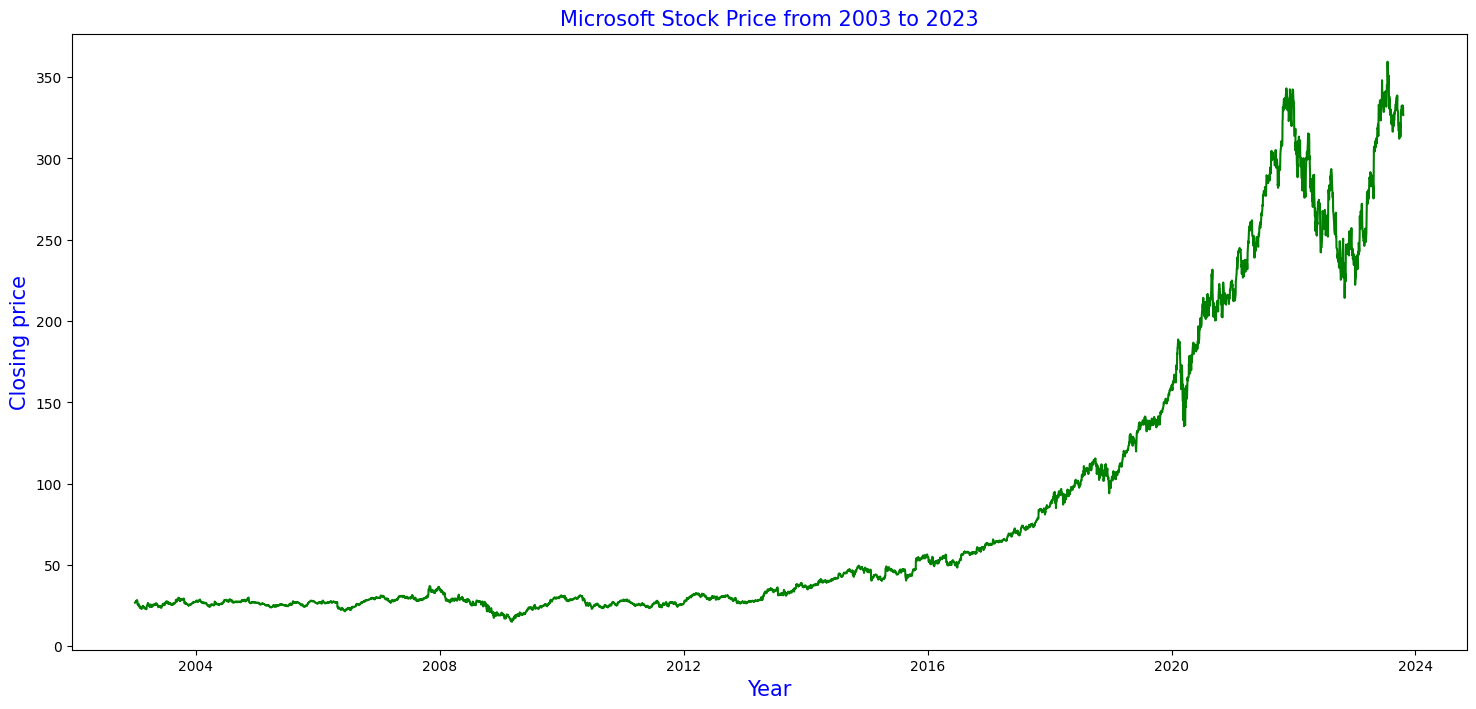

In [ ]:
# Plottting Closing Price over the years
plt.figure(figsize = (18,8))
plt.plot(stock["Date"],stock["Close"], color = "green")
plt.title("Microsoft Stock Price from 2003 to 2023", size = 15,color = "blue")
plt.xlabel("Year", size =15, color = "blue")
plt.ylabel("Closing price", size = 15,color = "blue")
plt.plot()

## Relative Strength Index

The Relative Strength Index (RSI) is a momentum oscillator used in technical analysis to measure the speed and change of price movements. It ranges from 0 to 100 and is typically used to identify overbought or oversold conditions in a financial instrument. An RSI above 70 suggests overbought conditions, while an RSI below 30 suggests oversold conditions.

In [ ]:
def relative_strength_index(value):
    profit = value[value>0].mean()
    loss = -1* value[value<0].mean()
    rs = profit/loss
    rsi = 100 - (100/(1+rs))
    return rsi

In [ ]:
stock['difference'] = stock['Close']- stock['Close'].shift(1).fillna(stock['Close'])
stock['RSI'] =  stock['difference'].rolling(center=False,window= 14).apply(relative_strength_index)
stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,difference,RSI
5232,2023-10-16,331.049988,336.140015,330.600006,332.640015,332.640015,22158000,4.910004,49.092599
5233,2023-10-17,329.589996,333.459991,327.410004,332.059998,332.059998,18338500,-0.580017,55.831635
5234,2023-10-18,332.489990,335.589996,328.299988,330.109985,330.109985,23153600,-1.950013,59.580624
5235,2023-10-19,332.149994,336.880005,330.910004,331.320007,331.320007,25052100,1.210022,58.923742
5236,2023-10-20,331.720001,331.920013,325.450012,326.670013,326.670013,25012600,-4.649994,55.042477


[]

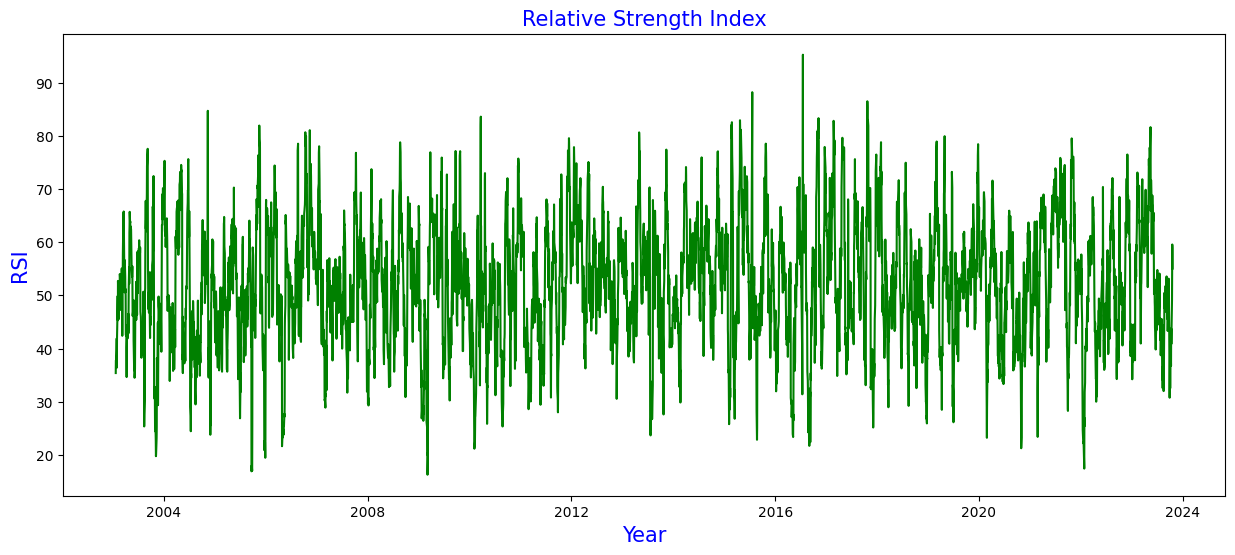

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(stock["Date"],stock["RSI"], color = "green")
plt.title("Relative Strength Index", size = 15,color = "blue")
plt.xlabel("Year", size =15, color = "blue")
plt.ylabel("RSI", size = 15,color = "blue")
plt.plot()


## Bollinger Bands

Bollinger Bands are a technical analysis tool used in financial markets. They consist of three lines: a middle band (usually a 20-day moving average) and two outer bands that are standard deviations away from the middle band.When prices approach the outer bands, it suggests overbought or oversold conditions, indicating potential price reversals.


In [ ]:
def bollinger_bands(closing_price):
  average =  closing_price.rolling(center=False,window= 20).mean()
  std = closing_price.rolling(center=False,window= 20).std()
  upper_band = average + 2*std
  lower_band = average - 2*std
  return average , upper_band, lower_band

In [ ]:
stock["BB_average"], stock["BB_upper_band"], stock["BB_lower_band"] = bollinger_bands(stock["Close"])
stock.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume,difference,RSI,BB_average,BB_upper_band,BB_lower_band
5232,2023-10-16,331.049988,336.140015,330.600006,332.640015,332.640015,22158000,4.910004,49.092599,322.037505,336.150997,307.924012
5233,2023-10-17,329.589996,333.459991,327.410004,332.059998,332.059998,18338500,-0.580017,55.831635,322.208005,336.734204,307.681806
5234,2023-10-18,332.489990,335.589996,328.299988,330.109985,330.109985,23153600,-1.950013,59.580624,322.675005,337.601571,307.748439
5235,2023-10-19,332.149994,336.880005,330.910004,331.320007,331.320007,25052100,1.210022,58.923742,323.264505,338.593913,307.935097
5236,2023-10-20,331.720001,331.920013,325.450012,326.670013,326.670013,25012600,-4.649994,55.042477,323.747505,338.854277,308.640734


[]

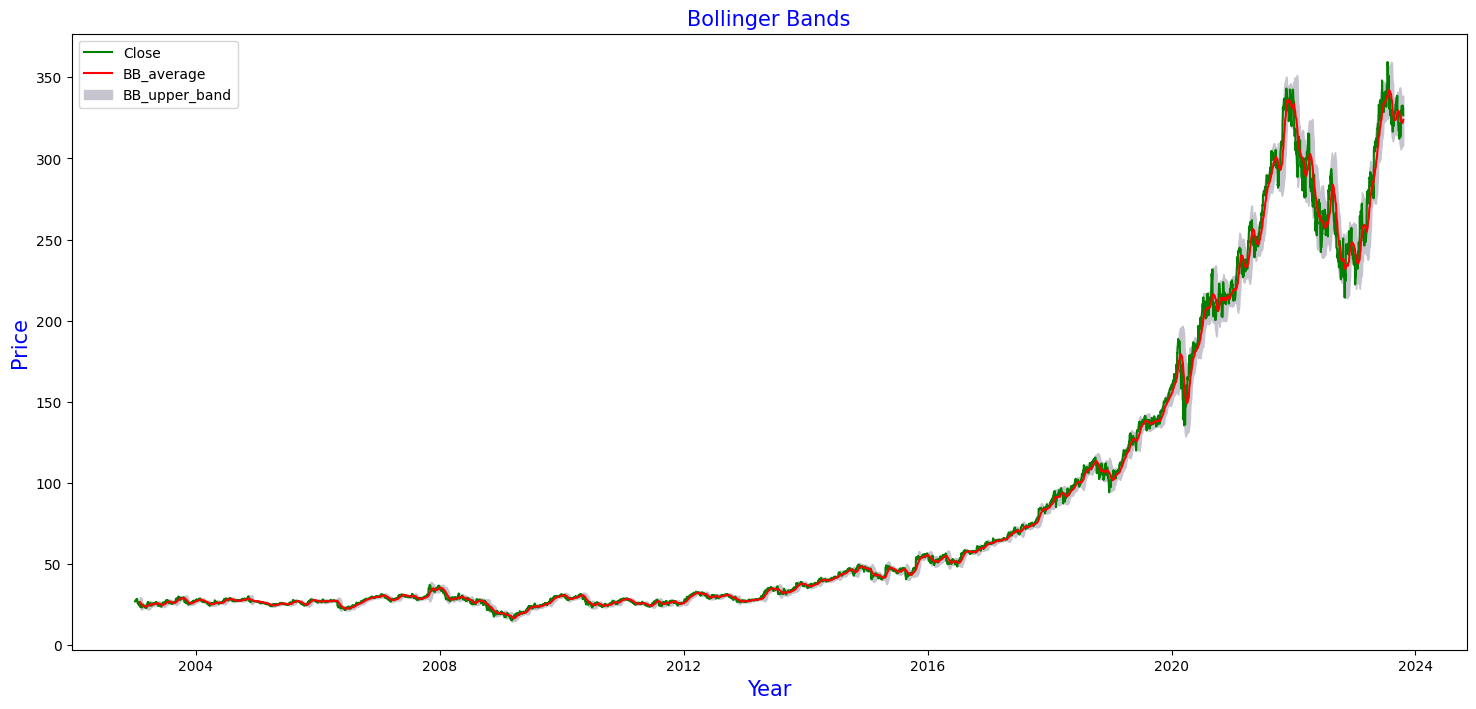

In [ ]:
## Plotting Bollinger Bands data from 2003 to 2023
plt.figure(figsize = (18,8))
plt.plot(stock["Date"],stock["Close"], color = "green")
plt.plot(stock["Date"],stock["BB_average"], color = "red")
plt.fill_between(stock["Date"],stock["BB_upper_band"],stock["BB_lower_band"], color = "#C6C5CF", alpha = 1, label ="Range")
plt.title("Bollinger Bands", size = 15,color = "blue")
plt.xlabel("Year", size =15, color = "blue")
plt.ylabel("Price", size = 15,color = "blue")
plt.legend(labels = ["Close","BB_average","BB_upper_band","Range"])
plt.plot()

[]

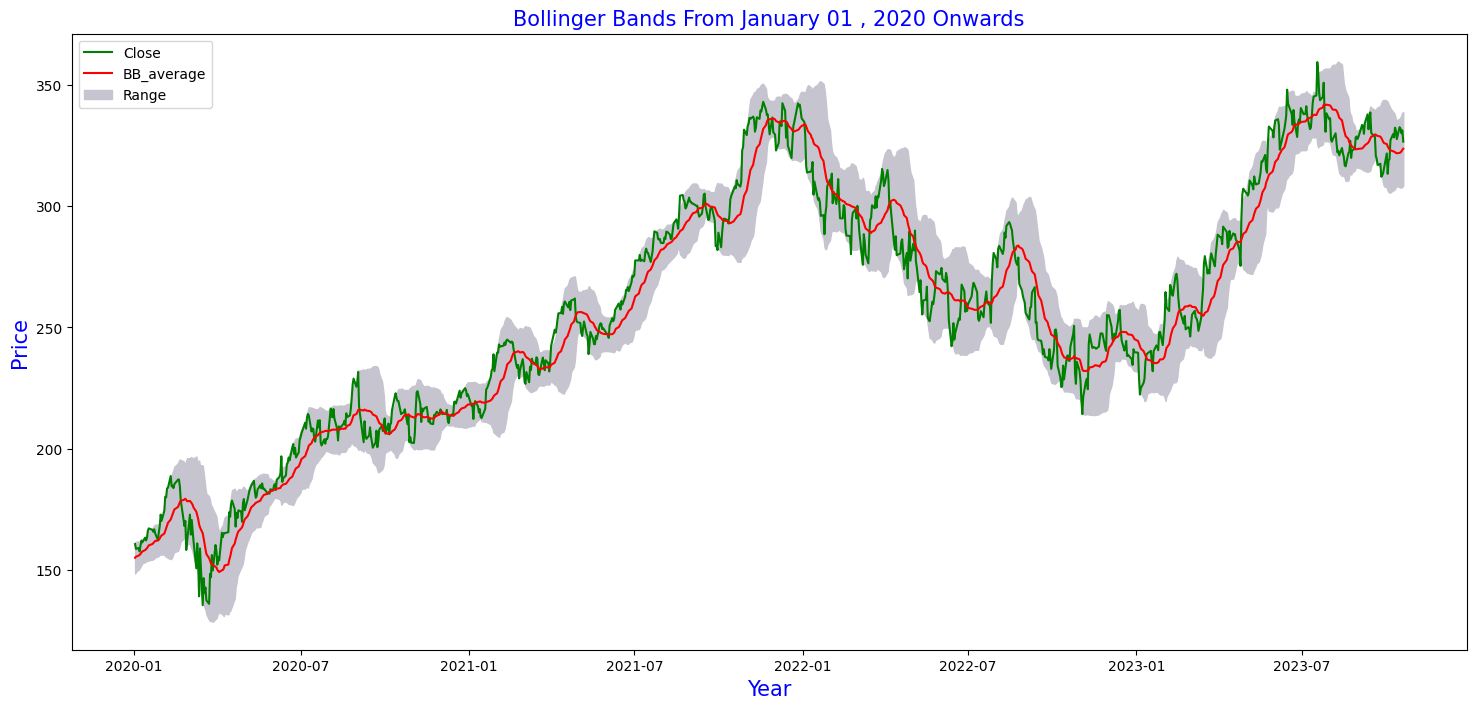

In [ ]:
## Plotting Bollinger Bands data from 2022 and 2023
data = stock[stock["Date"]>"2020-01-01"]
plt.figure(figsize = (18,8))
plt.plot(data["Date"],data["Close"], color = "green")
plt.plot(data["Date"],data["BB_average"], color = "red")
plt.fill_between(data["Date"],data["BB_upper_band"],data["BB_lower_band"], color = "#C6C5CF", alpha = 1, label ="Range")
plt.title("Bollinger Bands From January 01 , 2020 Onwards", size = 15,color = "blue")
plt.xlabel("Year", size =15, color = "blue")
plt.ylabel("Price", size = 15,color = "blue")
plt.legend(labels = ["Close","BB_average","Range"])
plt.plot()

[]

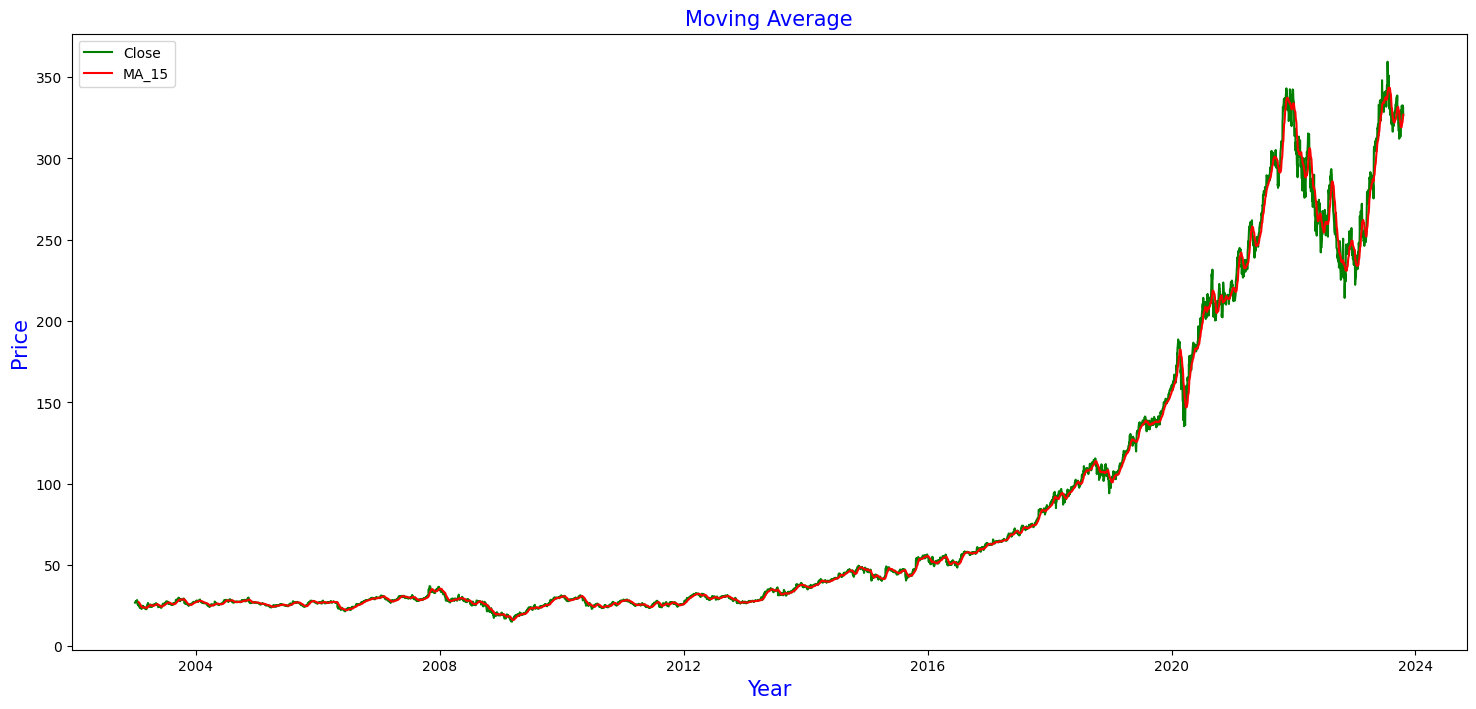

In [ ]:
## Plotting Closing Price with 15 days moving Average
stock["MA_15"] = stock["Close"].rolling(center=False,window= 15).mean()
plt.figure(figsize = (18,8))
plt.plot(stock["Date"],stock["Close"], color = "green")
plt.plot(stock["Date"],stock["MA_15"], color = "red")
plt.title("Moving Average", size = 15,color = "blue")
plt.xlabel("Year", size =15, color = "blue")
plt.ylabel("Price", size = 15,color = "blue")
plt.legend(labels = ["Close","MA_15"])
plt.plot()

## CandleStick

Candlestick are graphical representations of price movements in financial markets. Each "candle" shows the open, close, high, and low prices during a specific time period. Bullish candles have a higher close than open, while bearish candles close lower.

In [ ]:
## CandleStick Chart for the month from June to September 2023
import plotly.graph_objects as go
stock_2023 = stock[(stock["Date"]>= "2023-06-01") & (stock["Date"]<= "2023-09-30")]
go.Figure(data=[go.Candlestick(x=stock_2023["Date"],
                open=stock_2023["Open"],
                high=stock_2023["High"],
                low=stock_2023["Low"],
                close=stock_2023["Close"])])

In [ ]:
## CandleStick Chart From 2003 to 2023
import plotly.graph_objects as go
go.Figure(data=[go.Candlestick(x=stock["Date"],
                open=stock["Open"],
                high=stock["High"],
                low=stock["Low"],
                close=stock["Close"])])

## Train and Test Split

In [ ]:
stock.index= stock["Date"]
df = stock["Close"]
## Train_data and test_data contains Date as index column
train_data = df.iloc[:int(len(df)*0.80)]
test_data = df.iloc[int(len(df)*0.80):]


train = train_data.reset_index()
test = test_data.reset_index()

X_train = train["Date"].map(dt.datetime.toordinal)
X_train =  np.array(X_train).reshape(-1,1)
y_train = train["Close"]

X_test = test["Date"].map(dt.datetime.toordinal)
X_test = np.array(X_test).reshape(-1,1)
y_test = test["Close"]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4189, 1)
(1048, 1)
(4189,)
(1048,)


## Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

prediction  = model.predict(X_test)

test_data_lr = test_data.to_frame()
test_data_lr["Prediction"] = prediction

print("R^2 Score :", r2_score(y_test, prediction))
print("Mean Absolute Error :", mean_absolute_error(y_test, prediction))
print("Mean Squared Error :", mean_squared_error(y_test, prediction))

R^2 Score : -7.700485053258705
Mean Absolute Error : 162.31392787955173
Mean Squared Error : 29256.386368889198


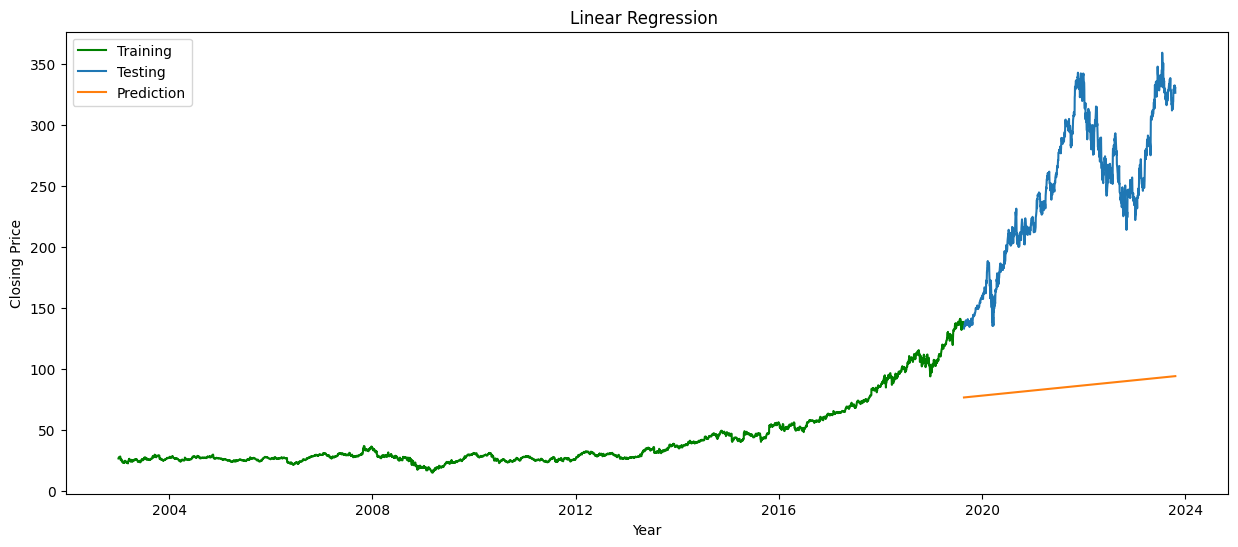

In [ ]:
## Plotting Linear Regression
plt.figure(figsize = (15,6) )
plt.plot(train_data, color ="Green")
plt.plot(test_data_lr)
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.legend(["Training", "Testing", "Prediction"])
plt.title("Linear Regression ")
plt.show()

Linear regression is not predicting correctly on this time series dataset. Lets try Random Forest Regression

## Random Forest

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

prediction  = model.predict(X_test)

test_data_rf = test_data.to_frame()
test_data_rf["Prediction"] = prediction

print("R^2 Score :", r2_score(y_test, prediction))
print("Mean Absolute Error :", mean_absolute_error(y_test, prediction))
print("Mean Squared Error :", mean_squared_error(y_test, prediction))

R^2 Score : -3.595675324951685
Mean Absolute Error : 110.03350401786243
Mean Squared Error : 15453.489329586118


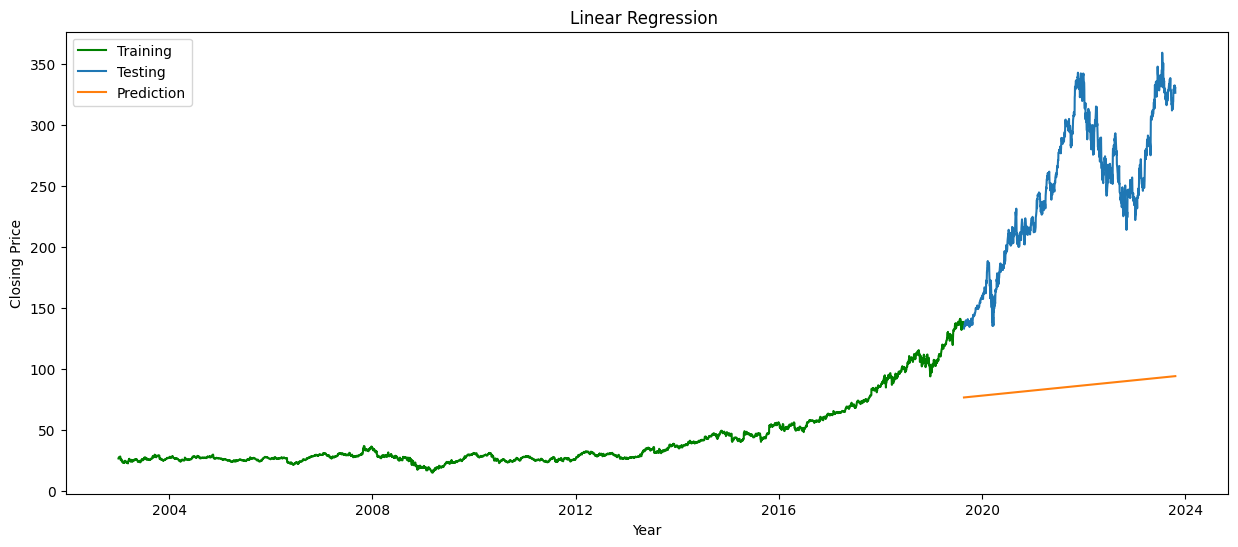

In [ ]:
## Plotting Random Forest
plt.figure(figsize = (15,6) )
plt.plot(train_data, color ="Green")
plt.plot(test_data_lr)
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.legend(["Training", "Testing", "Prediction"])
plt.title("Random Forest")
plt.show()

Random Forest is not predicting as per expectations . we will try some Time series model like ARIMA , Auto ARIMA and LSTM

## ARIMA (Auto Regressive Integrated Moving Averagre)

ARIMA stands for AR(p) Autoregression , I(d) Integration and MA(q) Moving average .The autoregressive order (p) represents the number of past observations used to predict the current value. It indicates how many lags of the dependent variable are included in the model. The integration order (d) represents the number of differences required to make the time series stationary.The moving average order (q) represents the number of past forecast errors (or white noise) terms used to predict the current value.

In [ ]:
## Check IF our Time Series is stationary or Not using Augmented Dickey Fuller test (ADF Test),
result = adfuller(stock.Close.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 2.145860
p-value: 0.998835


Our P value is 0.99 which is greater than 0.05 so our series is not stationary . In order to make it stationary we need to difference the series

In [ ]:
## Getting P value after using first differencing
result = adfuller(stock.Close.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -12.859357
p-value: 0.000000


Here we are gettting P value less than 0.05 on first differencing so we can use differencing value as 1.

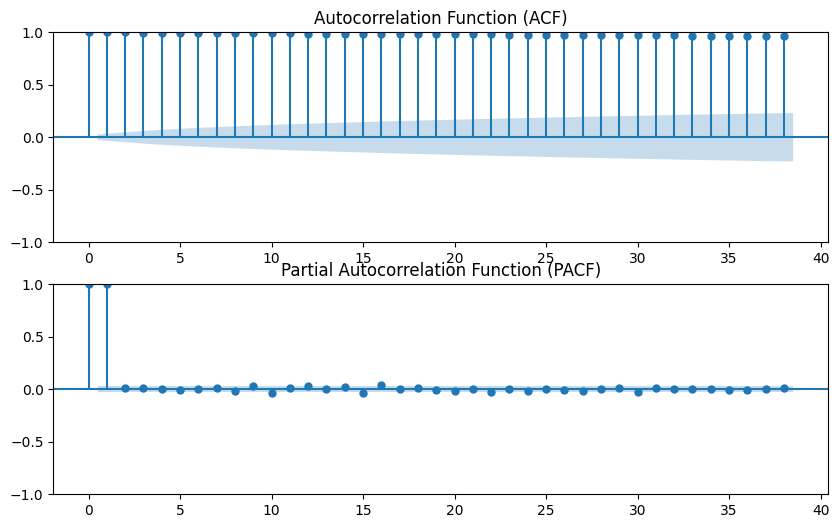

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(df,  ax=ax1)  # ACF plot
plot_pacf(df, ax=ax2)  # PACF plot
ax1.set_title('Autocorrelation Function (ACF)')
ax2.set_title('Partial Autocorrelation Function (PACF)')
plt.show()

we draw the ACF and PACF to know the P and Q value for ARIMA model.

In [ ]:
model = ARIMA(train_data, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4189
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -4658.557
Date:                Sun, 05 Nov 2023   AIC                           9325.114
Time:                        12:18:29   BIC                           9350.474
Sample:                             0   HQIC                          9334.082
                               - 4189                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5987      0.060     -9.982      0.000      -0.716      -0.481
ma.L1          0.5035      0.060      8.429      0.000       0.386       0.621
ma.L2         -0.1254      0.007    -17.080      0.0

In [ ]:
prediction =  model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
prediction_1 = np.array(prediction)
test_predicted = test_data.to_frame()
test_predicted["Prediction"] =prediction_1
print("R^2 Score :", r2_score(test_predicted["Close"], test_predicted["Prediction"]))
print("Mean Absolute Error :", mean_absolute_error(test_predicted["Close"], test_predicted["Prediction"]))

R^2 Score : -3.6067260700111783
Mean Absolute Error : 110.1937206985683


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



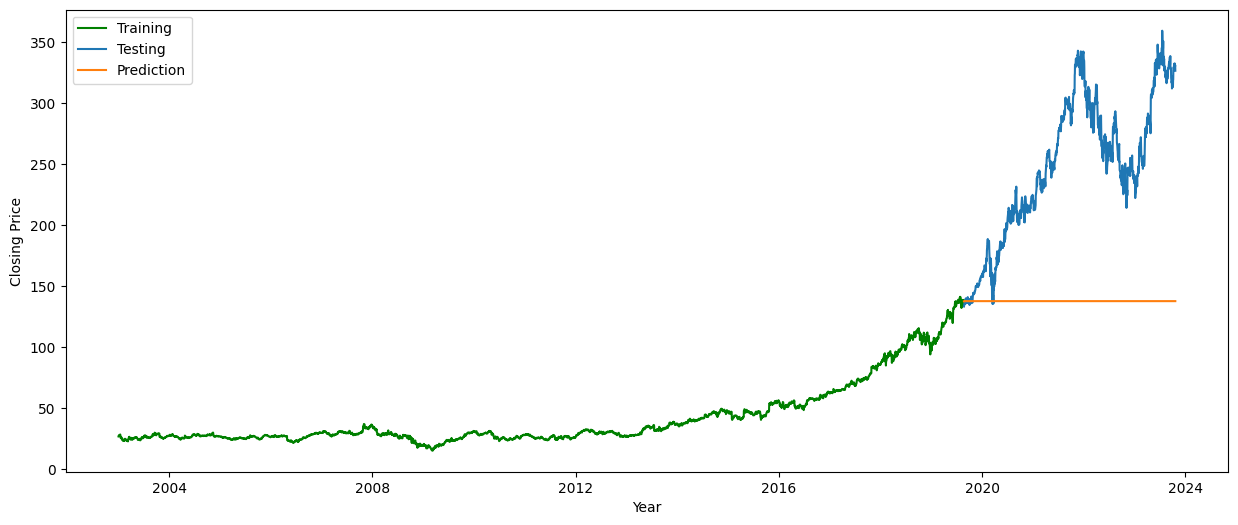

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(train_data, color ="Green")
plt.plot(test_predicted)
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.legend(["Training", "Testing", "Prediction"])

By using the p,d,q order as 1,1,2, we got probability values less than 0.05 but again predicted outcome is not as per expectaions . Lets try AUTO ARIMA model. where model automatically decide best value for the p,d,q .

## Auto ARIMA


In [ ]:
!pip install pmdarima

from pmdarima.arima import auto_arima
auto_model = auto_arima(train_data, seasonal=False, stepwise=True, trace=True)
print(auto_model.summary())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.9 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=18.06 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=12663.528, Time=0.13 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=11393.691, Time=0.37 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.92 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=12661.528, Time=0.33 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=10588.654, Time=1.34 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=10358.737, Time=1.00 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=10242.993, Time=1.83 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=10103.242, Time=2.58 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=16.53 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=9.09 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=10101.242, Time=0.67 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=10240.993, Time=0.49 sec
 ARIMA(5,2,1)(0,0,0)[0]      

In [ ]:
prediction =  auto_model.predict(n_periods=len(test_data))
prediction_1 = np.array(prediction)
test_predicted = test_data.to_frame()
test_predicted["Prediction"] =prediction_1
print("R^2 Score :", r2_score(test_predicted["Close"], test_predicted["Prediction"]))
print("Mean Absolute Error :", mean_absolute_error(test_predicted["Close"], test_predicted["Prediction"]))

R^2 Score : -2.7904452265371784
Mean Absolute Error : 85.74062155521503


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



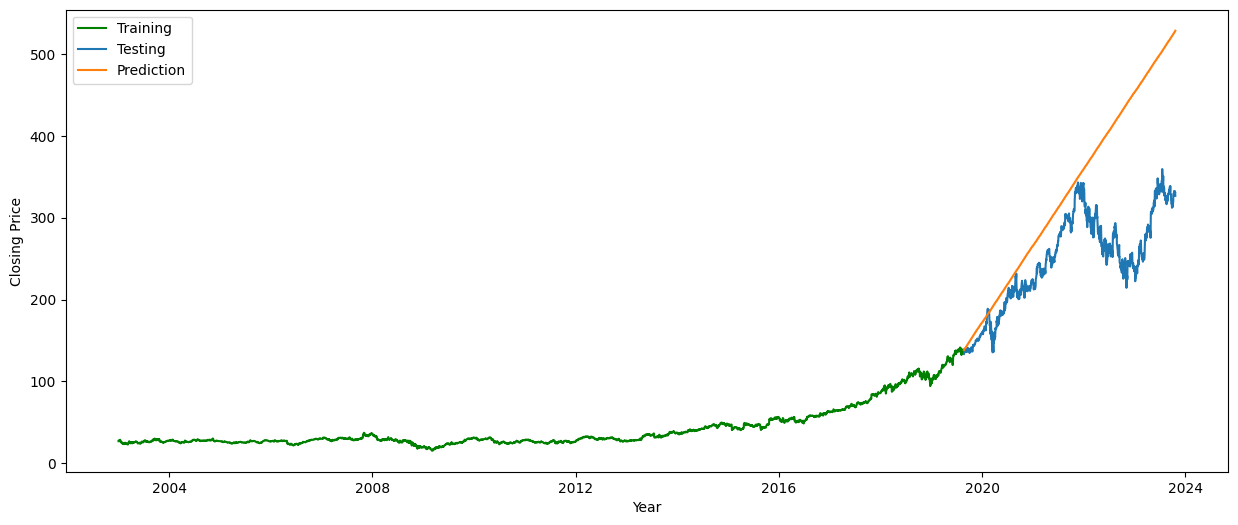

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(train_data, color ="Green")
plt.plot(test_predicted)
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.legend(["Training", "Testing", "Prediction"])

Auto ARIMA shows the Best model at ARIMA(5,2,0)(0,0,0) . Predicted output is better than ARIMA model but still require more accuracy

## LSTM (Long Short Term Memory)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
train_data_length = train_data.shape[0]
test_data_length =  test_data.shape[0]

train_data_ = df.iloc[:int(len(df)*0.80)]
test_data_ = df[len(df) - test_data_length - 60:]

train_values =  train_data_.to_frame().values
test_values = test_data_.to_frame().values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_data = scaler.fit_transform(train_values)
scaled_test_data = scaler.transform(test_values)

X_train , y_train ,X_test  = [],[],[]

for i in np.arange(60,len(scaled_train_data)):
    X_train.append(scaled_train_data[i-60:i,0])
    y_train.append(scaled_train_data[i,0])

for i in np.arange(60,len(scaled_test_data)):
    X_test.append(scaled_test_data[i-60:i,0])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

print(X_train.shape)
print(X_test.shape)

(4129, 60, 1)
(1048, 60, 1)


In [ ]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
130/130 [==============================] - 25s 33ms/step - loss: 0.0044
Epoch 2/50
130/130 [==============================] - 5s 38ms/step - loss: 0.0022
Epoch 3/50
130/130 [==============================] - 5s 37ms/step - loss: 0.0012
Epoch 4/50
130/130 [==============================] - 6s 47ms/step - loss: 0.0011
Epoch 5/50
130/130 [==============================] - 5s 39ms/step - loss: 0.0010
Epoch 6/50
130/130 [==============================] - 4s 34ms/step - loss: 8.5644e-04
Epoch 7/50
130/130 [==============================] - 5s 38ms/step - loss: 9.4776e-04
Epoch 8/50
130/130 [==============================] - 5s 40ms/step - loss: 8.7165e-04
Epoch 9/50
130/130 [==============================] - 4s 29ms/step - loss: 7.7131e-04
Epoch 10/50
130/130 [==============================] - 5s 39ms/step - loss: 8.3598e-04
Epoch 11/50
130/130 [==============================] - 4s 28ms/step - loss: 7.9310e-04
Epoch 12/50
130/130 [==============================] - 2s 15ms/step - l

33/33 [==============================] - 2s 8ms/step
RMSE value on test data : 147.15327


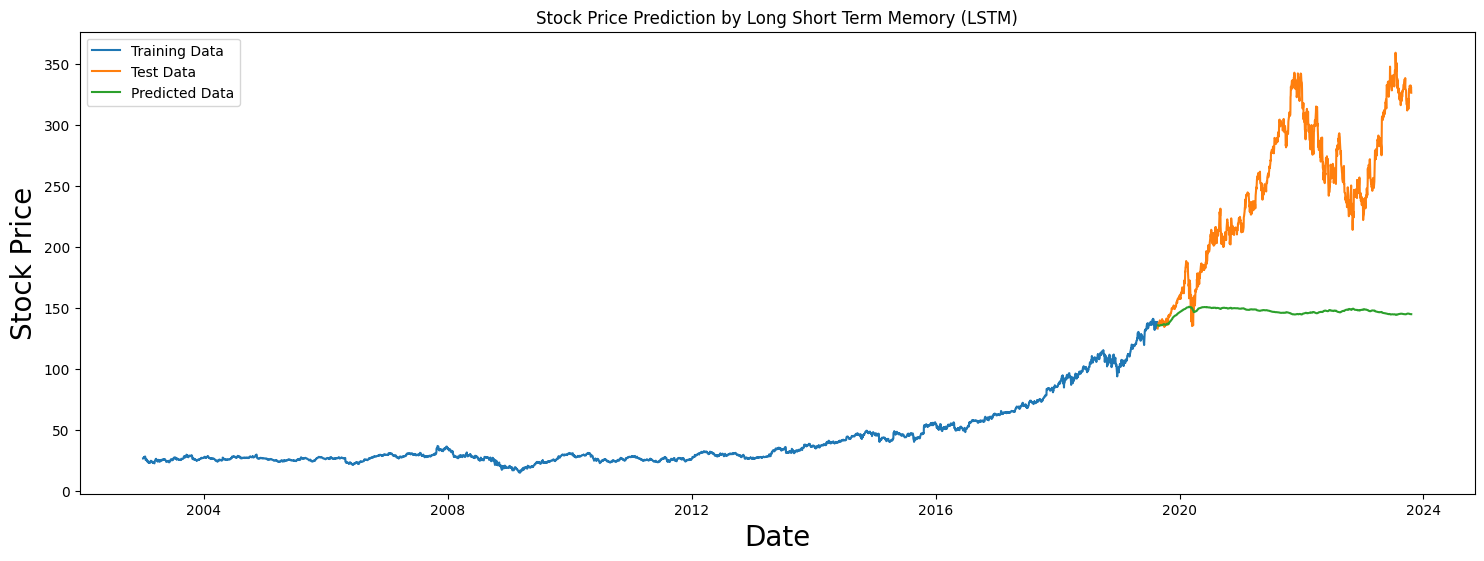

In [ ]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
print('RMSE value on test data :',np.sqrt(np.mean(np.power((predicted),2))))

train_data_ = train_data.to_frame()
test_data_ = test_data.to_frame()
test_data_['Predictions'] = predicted

plt.figure(figsize =(18,6))
plt.plot(train_data_['Close'])
plt.plot(test_data_[['Close','Predictions']])
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)')
plt.legend(['Training Data','Test Data','Predicted Data'])
plt.show()

The results for above models are not as per the expectation . The reason can be an upward trend of stock price  after year 2016 . So instead of taking 20 years of data , we will go with 8 years of data

## Auto ARIMA (Data from 2016 to 2023)

In [ ]:
df_new = df[df.index > '2016-01-01']

train_data = df_new.iloc[:int(len(df_new)*0.80)]
test_data = df_new.iloc[int(len(df_new)*0.80):]
auto_model = auto_arima(train_data, seasonal=False, stepwise=True, trace=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7698.629, Time=1.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7789.455, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7735.201, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7739.866, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7792.634, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7737.690, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7737.733, Time=0.49 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7736.232, Time=2.95 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=7739.967, Time=4.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7735.810, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=7738.194, Time=1.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7735.988, Time=2.04 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.12 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=7702.928, Time=0.67 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] i

In [ ]:
prediction =  auto_model.predict(n_periods=len(test_data))
prediction_1 = np.array(prediction)
test_predicted = test_data.to_frame()
test_predicted["Prediction"] =prediction_1
print("R^2 Score :", r2_score(test_predicted["Close"], test_predicted["Prediction"]))
print("Mean Absolute Error :", mean_absolute_error(test_predicted["Close"], test_predicted["Prediction"]))

R^2 Score : -2.996264572211229
Mean Absolute Error : 66.42989417857697


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



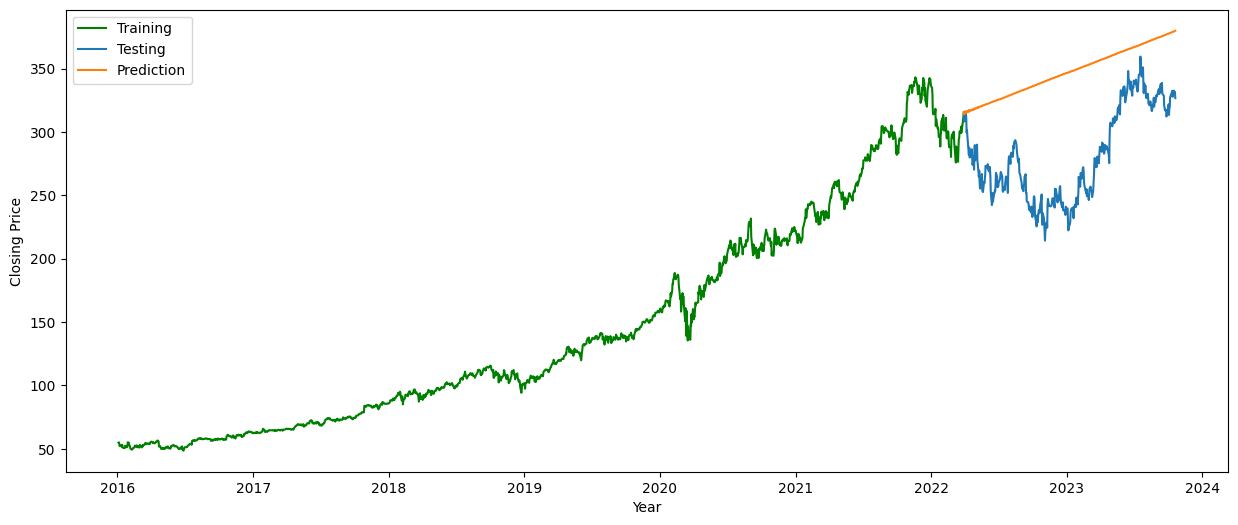

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(train_data, color ="Green")
plt.plot(test_predicted)
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.legend(["Training", "Testing", "Prediction"])

## LSTM (Data From 2016 to 2023)

In [ ]:
df_new = df[df.index > '2016-01-01']

train_data = df_new.iloc[:int(len(df_new)*0.80)]
test_data = df_new.iloc[int(len(df_new)*0.80):]

train_data_length = train_data.shape[0]
test_data_length =  test_data.shape[0]

train_data_ = df_new.iloc[:int(len(df_new)*0.80)]
test_data_ = df_new[len(df_new) - test_data_length - 60:]

train_values =  train_data_.to_frame().values
test_values = test_data_.to_frame().values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_data = scaler.fit_transform(train_values)
scaled_test_data = scaler.transform(test_values)

X_train , y_train ,X_test  = [],[],[]

for i in np.arange(60,len(scaled_train_data)):
    X_train.append(scaled_train_data[i-60:i,0])
    y_train.append(scaled_train_data[i,0])

for i in np.arange(60,len(scaled_test_data)):
    X_test.append(scaled_test_data[i-60:i,0])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

print(X_train.shape)
print(X_test.shape)

(1511, 60, 1)
(393, 60, 1)


In [ ]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
48/48 [==============================] - 9s 16ms/step - loss: 0.0157
Epoch 2/50
48/48 [==============================] - 1s 15ms/step - loss: 0.0031
Epoch 3/50
48/48 [==============================] - 1s 15ms/step - loss: 0.0039
Epoch 4/50
48/48 [==============================] - 1s 15ms/step - loss: 0.0030
Epoch 5/50
48/48 [==============================] - 1s 23ms/step - loss: 0.0026
Epoch 6/50
48/48 [==============================] - 1s 22ms/step - loss: 0.0025
Epoch 7/50
48/48 [==============================] - 1s 18ms/step - loss: 0.0023
Epoch 8/50
48/48 [==============================] - 1s 18ms/step - loss: 0.0026
Epoch 9/50
48/48 [==============================] - 1s 21ms/step - loss: 0.0020
Epoch 10/50
48/48 [==============================] - 1s 21ms/step - loss: 0.0027
Epoch 11/50
48/48 [==============================] - 1s 20ms/step - loss: 0.0019
Epoch 12/50
48/48 [==============================] - 1s 19ms/step - loss: 0.0019
Epoch 13/50
48/48 [==================

13/13 [==============================] - 1s 8ms/step
RMSE value on test data : 279.8089


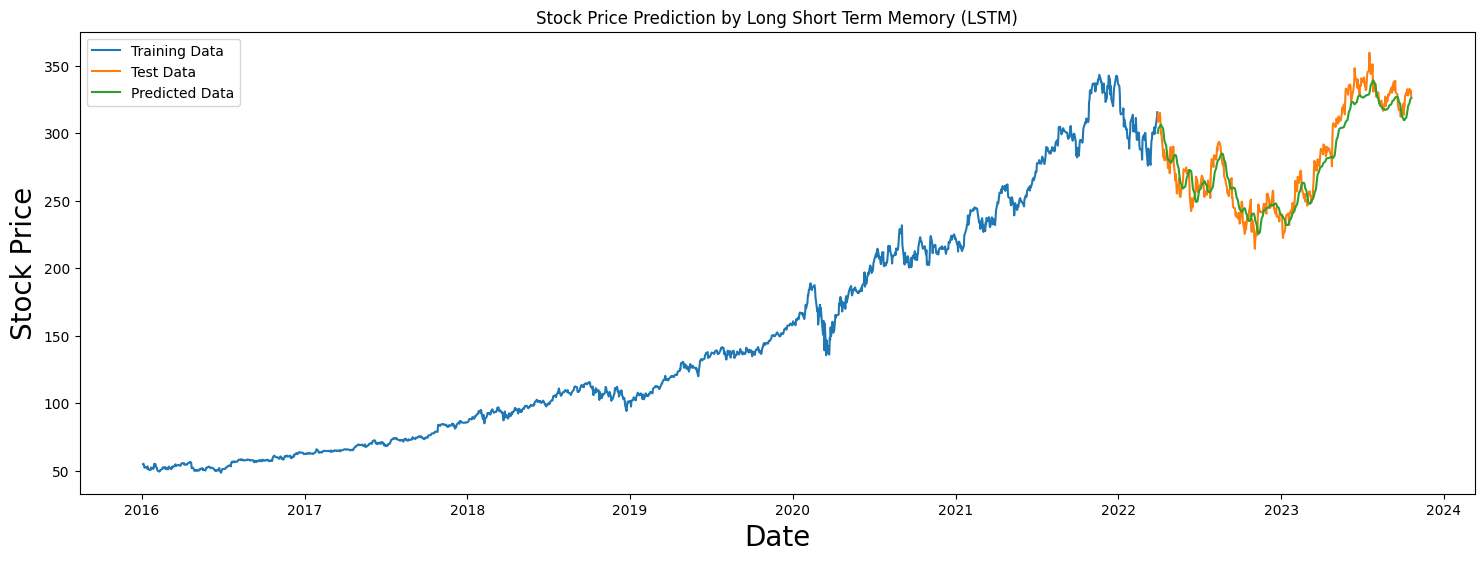

In [ ]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
print('RMSE value on test data :',np.sqrt(np.mean(np.power((predicted),2))))

train_data_ = train_data.to_frame()
test_data_ = test_data.to_frame()
test_data_['Predictions'] = predicted

plt.figure(figsize =(18,6))
plt.plot(train_data_['Close'])
plt.plot(test_data_[['Close','Predictions']])
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)')
plt.legend(['Training Data','Test Data','Predicted Data'])
plt.show()

This prediction is close to what we require .

In [ ]:
test_data_.tail()

,Close,Predictions
Date,,
2023-10-16,332.640015,322.095612
2023-10-17,332.059998,323.711060
2023-10-18,330.109985,324.899750
2023-10-19,331.320007,325.613098
2023-10-20,326.670013,325.900208


Now we have predictions till 20th October 2023. In order to predict the stock price of Next day, we need to take the test data of price of previous 60 days

In [ ]:
test = df.tail(60).to_frame().values
scaled_test_data = scaler.transform(test)
test = np.reshape(scaled_test_data, (1,scaled_test_data.shape[0],test.shape[1]))
predicted = model.predict(test)
predicted = scaler.inverse_transform(predicted)

print(predicted)

1/1 [==============================] - 0s 22ms/step
[[325.70813]]


From the above given models , we can conclude that LSTM is the best model that predict the price closer to actual values.